In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



In [26]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"



In [36]:
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=column_names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']



In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [31]:
y_pred = rf_model.predict(X_test)



In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.7207792207792207
Confusion Matrix:
 [[77 22]
 [21 34]]


In [43]:
importances = rf_model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_importance)


Glucose                     0.258864
BMI                         0.169984
Age                         0.140931
DiabetesPedigreeFunction    0.123768
BloodPressure               0.088134
Pregnancies                 0.076551
Insulin                     0.076122
SkinThickness               0.065646
dtype: float64


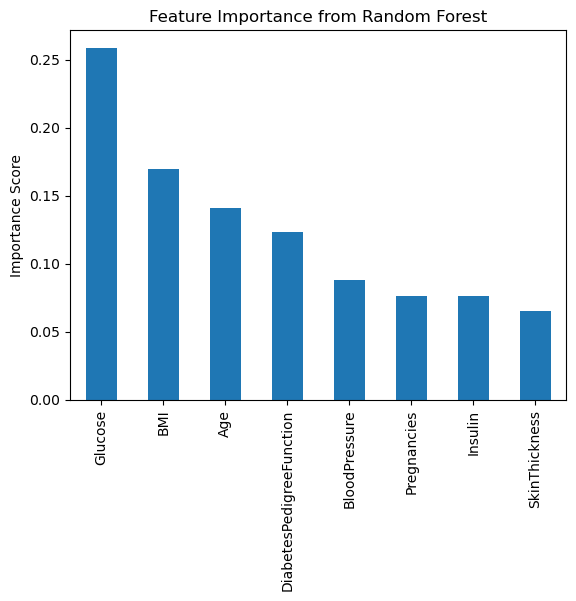

In [44]:
import matplotlib.pyplot as plt

feat_importance.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance Score')
plt.show()
